In [1]:
import numpy as np 

pygame 2.6.0 (SDL 2.28.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########
Starting Genetic Algorithm Optimization...
gen	nevals	avg    	std    	min     	max   
0  	0     	8.87964	27.7438	-6.41346	90.847
1  	55    	31.0498	38.2454	-6.41836	91.4906
2  	56    	52.4014	37.0409	-6.30628	92.047 
3  	64    	60.2709	34.6947	-5.79606	92.0509
4  	59    	62.2816	35.8977	-6.48311	92.6906
5  	66    	59.9151	37.7802	

C:\Users\liaojw\Documents\study\course\Evolutionary Computing\assignment1\evoman_framework_group24\venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\liaojw\Documents\study\course\Evolutionary Computing\assignment1\evoman_framework_group24\venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	std    	min     	max    
0  	0     	8.70936	26.6746	-6.42811	91.4906
1  	60    	20.5652	33.2292	-6.30628	91.4906
2  	60    	34.195 	35.1102	-6.40688	92.9362
3  	73    	45.4049	36.3536	-6.40523	92.9362
4  	47    	58.7074	37.9707	-5.90808	92.9362
5  	67    	65.4366	38.5197	-6.56103	92.9362
6  	56    	69.2178	36.479 	-5.90808	92.9362
7  	64    	64.5505	37.447 	-6.01372	92.9362
8  	58    	71.1092	34.6336	-6.56103	92.9362
9  	76    	64.5483	36.6209	-5.90808	92.9362
10 	50    	76.7781	27.4334	-5.89715	92.9362
11 	56    	72.8105	32.2359	-5.86079	92.9362
12 	58    	71.9186	31.9178	-5.79606	92.9362
13 	52    	74.2851	31.8681	-6.39526	92.9362
14 	62    	68.4508	34.7891	-5.85793	92.9362
15 	56    	73.4003	33.6294	-5.89715	93.0721
16 	57    	72.8144	33.522 	-5.79606	92.9362
17 	66    	76.0036	32.6925	-5.79606	92.9362
18 	51    	84.1738	24.9711	-5.90808	93.1321
19 	75    	82.6303	25.8141	-5.79606	93.3062
20 	65    	83.5763	24.2202	-5.79606	93.1321
21 	59    	80.9638	24.2061	-5.79

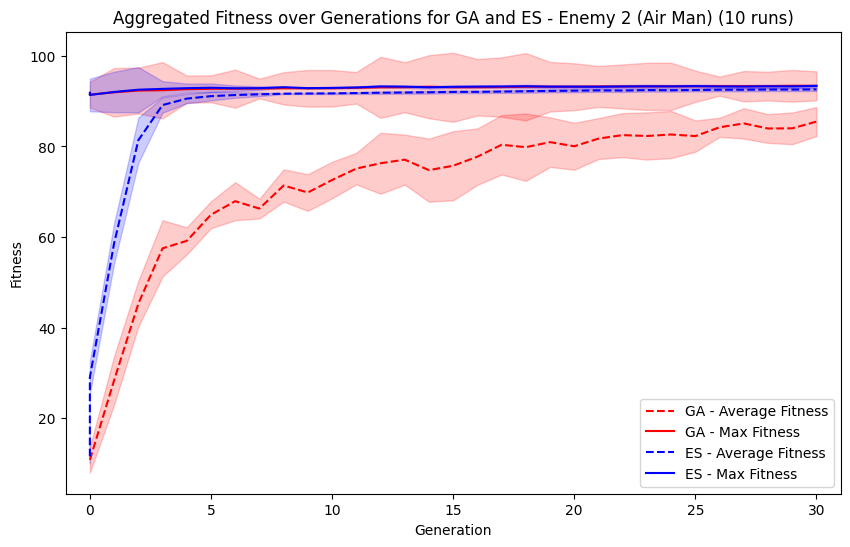

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
import re
from training_specialist_jiawei import EvolutAlgorithmOptimizer  # 导入类 


def run_optimizer(mode):

    # Set headless mode for faster experiments
    headless = True
    if headless:
        os.environ["SDL_VIDEODRIVER"] = "dummy"

    experiment_name = 'optimization_test'
    enemies = [2]
    n_hidden_neurons = 10
    n_population = 100
    n_generations = 30
    mutation_rate = 0.2
    sigma = 0.1

    optimizer = EvolutAlgorithmOptimizer(experiment_name, enemies, n_hidden_neurons, n_population, n_generations,
                                         mutation_rate, sigma, mode=mode)
    stats_path = optimizer.execute()

    if os.path.exists(stats_path):
        return stats_path
    else:
        raise Exception(f"Could not find stats.txt path for {mode}")

def aggregate_stats(mode, runs):
    all_data = []
    for _ in range(runs):
        stats_path = run_optimizer(mode)
        data = np.genfromtxt(stats_path, skip_header=1)
        all_data.append(data)

    all_data = np.array(all_data)
    mean_data = np.mean(all_data, axis=0)
    std_data = np.std(all_data, axis=0)

    aggregated_data = np.column_stack(
        (mean_data[:, 0], mean_data[:, 1], mean_data[:, 2], std_data[:, 1], std_data[:, 2]))
    return aggregated_data

def plot_aggregated_stats(aggregated_data_1, aggregated_data_2, num_runs):
    generations_1 = aggregated_data_1[:, 0]
    avg_fitness_1 = aggregated_data_1[:, 1]
    max_fitness_1 = aggregated_data_1[:, 2]
    std_dev_1 = aggregated_data_1[:, 3]

    generations_2 = aggregated_data_2[:, 0]
    avg_fitness_2 = aggregated_data_2[:, 1]
    max_fitness_2 = aggregated_data_2[:, 2]
    std_dev_2 = aggregated_data_2[:, 3]

    plt.figure(figsize=(10, 6))

    # Plot EA1 (GA)
    plt.plot(generations_1, avg_fitness_1, label='GA - Average Fitness', color='red', linestyle='--')
    plt.fill_between(generations_1, avg_fitness_1 - std_dev_1, avg_fitness_1 + std_dev_1, color='red', alpha=0.2)
    plt.plot(generations_1, max_fitness_1, label='GA - Max Fitness', color='red')
    plt.fill_between(generations_1, max_fitness_1 - std_dev_1, max_fitness_1 + std_dev_1, color='red', alpha=0.2)

    # Plot EA2 (ES)
    plt.plot(generations_2, avg_fitness_2, label='ES - Average Fitness', color='blue', linestyle='--')
    plt.fill_between(generations_2, avg_fitness_2 - std_dev_2, avg_fitness_2 + std_dev_2, color='blue', alpha=0.2)
    plt.plot(generations_2, max_fitness_2, label='ES - Max Fitness', color='blue')
    plt.fill_between(generations_2, max_fitness_2 - std_dev_2, max_fitness_2 + std_dev_2, color='blue', alpha=0.2)

    plt.title('Aggregated Fitness over Generations for GA and ES - Enemy 2 (Air Man) ({} runs)'.format(num_runs))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(False)
    plt.xlim(min(generations_1.min(), generations_2.min()) - 1, max(generations_1.max(), generations_2.max()) + 1)
    plt.savefig('aggregated_fitness_comparison_enemy_2_air_man.png')
    plt.show()

if __name__ == "__main__":
    num_runs = 10

    aggregated_data_1 = aggregate_stats("GA", num_runs)

    aggregated_data_2 = aggregate_stats("ES", num_runs)

    plot_aggregated_stats(aggregated_data_1, aggregated_data_2, num_runs)


In [3]:
enemies_list=[[i] for i in range(1,9)]
enemies_list

[[1], [2], [3], [4], [5], [6], [7], [8]]

In [4]:
np.random.randint(1,1000)

620